In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv("laptops.csv")

In [3]:
data.head()

,Company,Type,Inches,RAM,Processor Name,Osys,MEMORY,TouchScreen,Graphic Card,KGs,X_RES,Y_RES,Price
0,ASUS,Thin and Light Laptop,15.6 Inch,8 GB,Intel Core i3 11th Gen,Windows 11,256 GB SSD,No,No,1.80,1920.0,1080.0,34990
1,Avita,Laptop,14.1 Inch,4 GB,Intel Celeron Dual Core,Windows 11,128 GB SSD,No,No,NaN,1920.0,1080.0,16490
2,DELL,Thin and Light Laptop,38 cm,8 GB,Intel Core i3 11th Gen,Windows 11,512 GB SSD,No,No,1.80,1920.0,1080.0,35990
3,Lenovo,Thin and Light Laptop,36.62 cm,8 GB,AMD Ryzen 5 Hexa Core,Windows 11,512 GB SSD,No,No,1.65,1920.0,1080.0,48450
4,HP,Thin and Light Laptop,15.6 Inch,8 GB,Intel Core i3 11th Gen,Windows 11,512 GB SSD,No,No,1.69,1920.0,1080.0,38990


In [4]:
data.shape

(984, 13)

In [5]:
data.info() #information about DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         984 non-null    object 
 1   Type            984 non-null    object 
 2   Inches          984 non-null    object 
 3   RAM             984 non-null    object 
 4   Processor Name  984 non-null    object 
 5   Osys            984 non-null    object 
 6   MEMORY          984 non-null    object 
 7   TouchScreen     984 non-null    object 
 8   Graphic Card    984 non-null    object 
 9   KGs             830 non-null    float64
 10  X_RES           928 non-null    float64
 11  Y_RES           928 non-null    float64
 12  Price           984 non-null    int64  
dtypes: float64(3), int64(1), object(9)
memory usage: 100.1+ KB


In [6]:
data.duplicated().sum()

433

In [7]:
data.drop_duplicates(inplace=True) #dropping duplicate entries.

In [8]:
data.shape

(551, 13)

In [9]:
data.duplicated().sum() #rechecking number of duplicate entries if any."

0

In [10]:
data.isnull().sum()

Company            0
Type               0
Inches             0
RAM                0
Processor Name     0
Osys               0
MEMORY             0
TouchScreen        0
Graphic Card       0
KGs               47
X_RES             39
Y_RES             39
Price              0
dtype: int64

In [11]:
df = data.dropna(subset=['KGs'])

In [12]:
df.isnull().sum()

Company            0
Type               0
Inches             0
RAM                0
Processor Name     0
Osys               0
MEMORY             0
TouchScreen        0
Graphic Card       0
KGs                0
X_RES             21
Y_RES             21
Price              0
dtype: int64

In [13]:
df = df.dropna(subset=['X_RES'])
df = df.dropna(subset=['Y_RES'])

In [14]:
df.isnull().sum()

Company           0
Type              0
Inches            0
RAM               0
Processor Name    0
Osys              0
MEMORY            0
TouchScreen       0
Graphic Card      0
KGs               0
X_RES             0
Y_RES             0
Price             0
dtype: int64

In [15]:
df.shape

(483, 13)

In [16]:
df.sample(5)

,Company,Type,Inches,RAM,Processor Name,Osys,MEMORY,TouchScreen,Graphic Card,KGs,X_RES,Y_RES,Price
174,HP,Gaming Laptop,15.6 Inch,16 GB,AMD Ryzen 5 Hexa Core,Windows 11,512 GB SSD,No,Yes,2.37,1920.0,1080.0,65990
188,DELL,Thin and Light Laptop,38 cm,8 GB,AMD Ryzen 3 Dual Core,Windows 11,256 GB SSD,No,No,1.80,1920.0,1080.0,34790
942,Acer,Thin and Light Laptop,15.6 inch,8 GB,Intel Core i5 11th Gen,Windows 10,512 GB SSD,No,No,1.65,1920.0,1080.0,47499
153,HP,Thin and Light Laptop,14 Inch,8 GB,Intel Core i3 12th Gen,Windows 11,512 GB SSD,No,No,1.41,1920.0,1080.0,56490
762,HP,Thin and Light Laptop,15.6 Inch,8 GB,AMD Ryzen 5 Quad Core,Windows 11,512 GB SSD,No,No,1.75,1920.0,1080.0,49990


In [17]:
#DATA PRE-PROCESSING

In [18]:
#RAM
df['RAM']=df['RAM'].str.replace('GB',"")

In [19]:
df['RAM'].value_counts()

8      241
16     198
4       25
32      19
Name: RAM, dtype: int64

In [20]:
df['RAM']=df['RAM'].astype('int64')

In [21]:
#inch

def cm_inch(x):
    if(x.find('cm')!=-1):
        x= x.split()[0]
        x= float(x)
        return round(x*0.39,1)
    else:
        x= x.split()[0]
        return round(float(x),1)


In [22]:
df['Inches']=df['Inches'].apply(cm_inch)

In [23]:
df['Inches'].value_counts()

15.6    257
14.0    125
16.0     29
13.3     18
17.3      9
14.8      7
16.1      6
11.6      5
13.4      4
13.6      3
14.1      3
15.5      2
15.0      2
13.9      2
13.0      2
11.0      1
13.5      1
7.0       1
14.3      1
13.2      1
16.2      1
17.0      1
18.0      1
15.3      1
Name: Inches, dtype: int64

In [24]:
df['Inches']=df['Inches'].astype('float64')

In [25]:
df['TouchScreen'] = df['TouchScreen'].apply(lambda x : 1 if 'Yes' in x else 0)
df['Graphic Card'] = df['Graphic Card'].apply(lambda x : 1 if 'Yes' in x else 0)

In [26]:
df.head()

,Company,Type,Inches,RAM,Processor Name,Osys,MEMORY,TouchScreen,Graphic Card,KGs,X_RES,Y_RES,Price
0,ASUS,Thin and Light Laptop,15.6,8,Intel Core i3 11th Gen,Windows 11,256 GB SSD,0,0,1.80,1920.0,1080.0,34990
2,DELL,Thin and Light Laptop,14.8,8,Intel Core i3 11th Gen,Windows 11,512 GB SSD,0,0,1.80,1920.0,1080.0,35990
3,Lenovo,Thin and Light Laptop,14.3,8,AMD Ryzen 5 Hexa Core,Windows 11,512 GB SSD,0,0,1.65,1920.0,1080.0,48450
4,HP,Thin and Light Laptop,15.6,8,Intel Core i3 11th Gen,Windows 11,512 GB SSD,0,0,1.69,1920.0,1080.0,38990
5,HP,Thin and Light Laptop,14.0,8,AMD Ryzen 3 Quad Core,Windows 11,512 GB SSD,0,0,1.46,1920.0,1080.0,37880


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

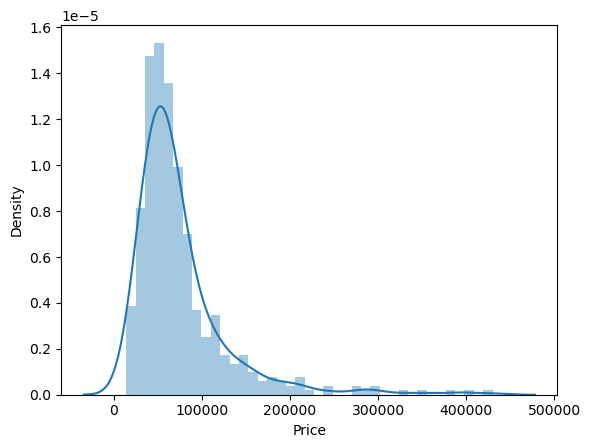

In [28]:
sns.distplot(df['Price'])

In [29]:
#Price is positively skewed

<Axes: >

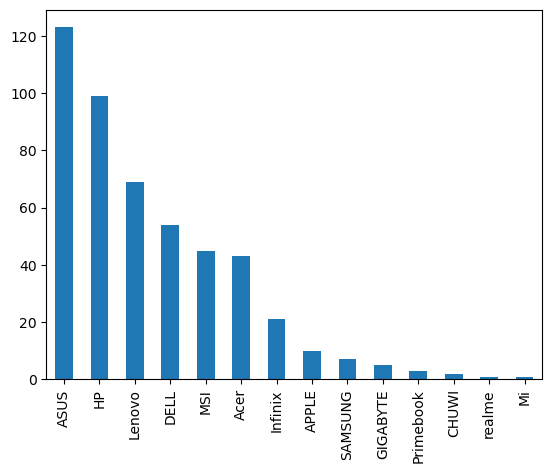

In [30]:
df['Company'].value_counts().plot(kind='bar')

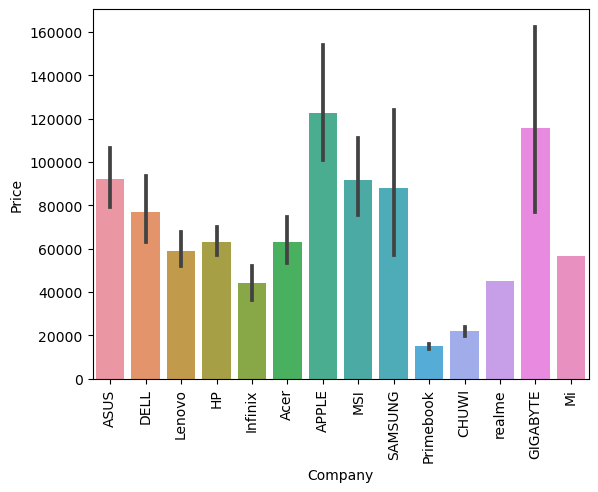

In [31]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [32]:
#Type Column
df['Type'].value_counts()

Thin and Light Laptop    253
Gaming Laptop            108
Gaming                    41
Laptop                    23
2 in 1 Laptop             23
Notebook                  12
Chromebook                10
Business Laptop            6
2 in 1 Gaming Laptop       5
Handheld Gaming PC         1
TUF GAMING A15             1
Name: Type, dtype: int64

In [33]:
def type_convert(x):
    
    x=x.lower()
    if(x.find('gaming' and '2 in 1')!=-1):
        return x
    elif(x.find('gaming')!=-1):
        return 'Gaming Laptop'
    elif(x.find('2 in 1')!=-1):
        return x
    elif(x.find('notebook')!=-1):
        return x
    elif(x.find('chromebook')!=-1):
        return x
    elif(x.find('business laptop')!=-1):
        return x
    else:
        return 'laptop'
    

In [34]:
df['Type']=df['Type'].apply(type_convert)

In [35]:
df['Type'].value_counts()

laptop                  276
Gaming Laptop           151
2 in 1 laptop            23
notebook                 12
chromebook               10
business laptop           6
2 in 1 gaming laptop      5
Name: Type, dtype: int64

<Axes: >

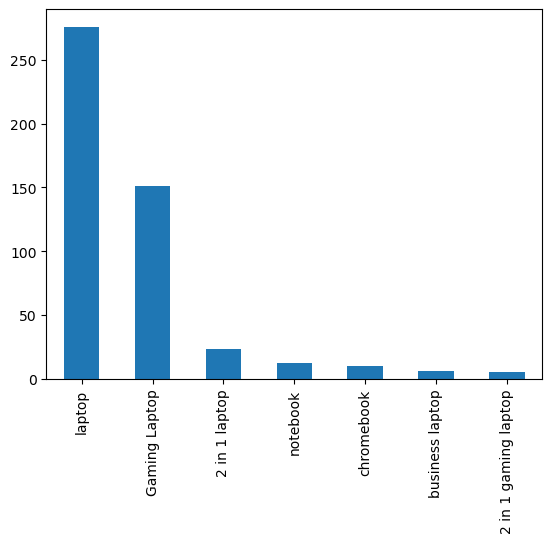

In [36]:
df['Type'].value_counts().plot(kind='bar')

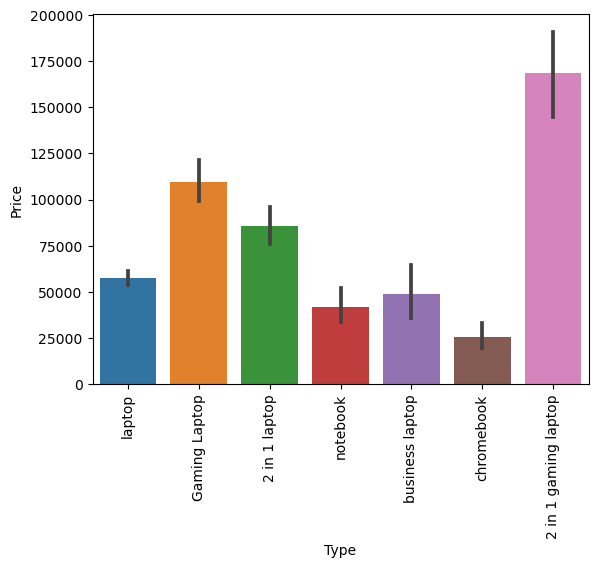

In [37]:
sns.barplot(x=df['Type'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

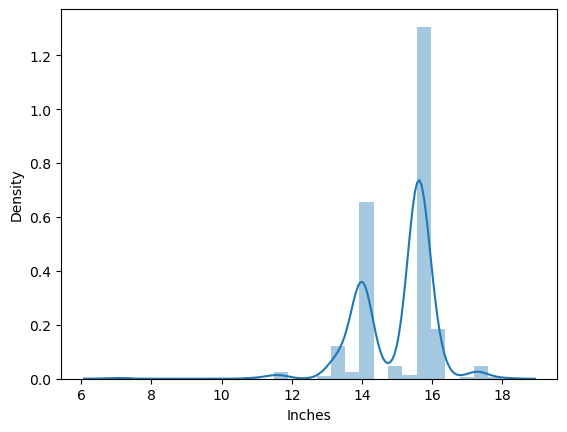

In [38]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

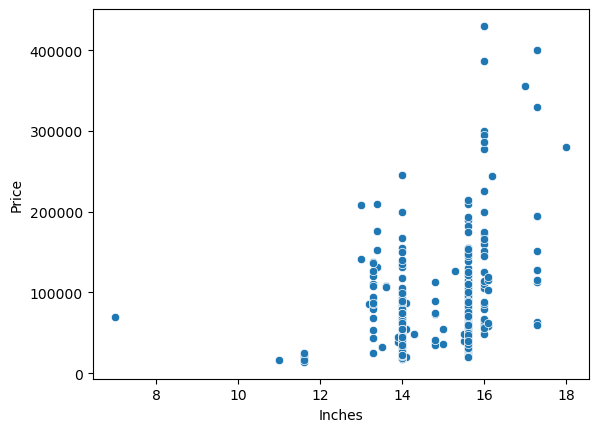

In [39]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

<Axes: >

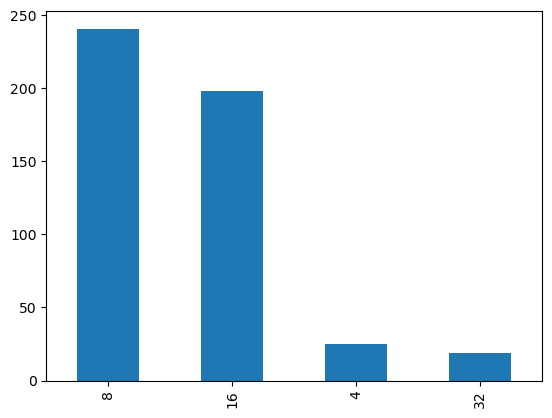

In [40]:
df['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='RAM', ylabel='Price'>

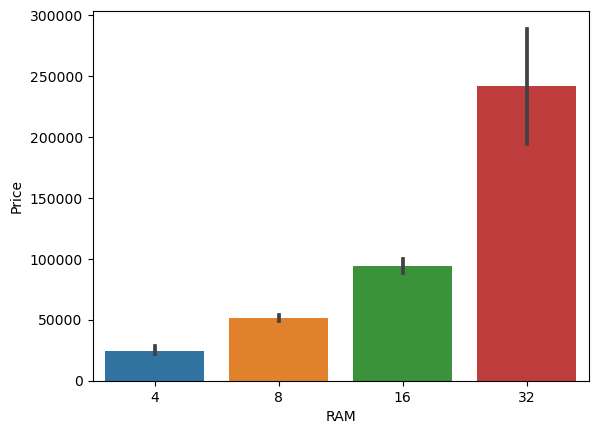

In [41]:
sns.barplot(x=df['RAM'],y=df['Price'])

<Axes: >

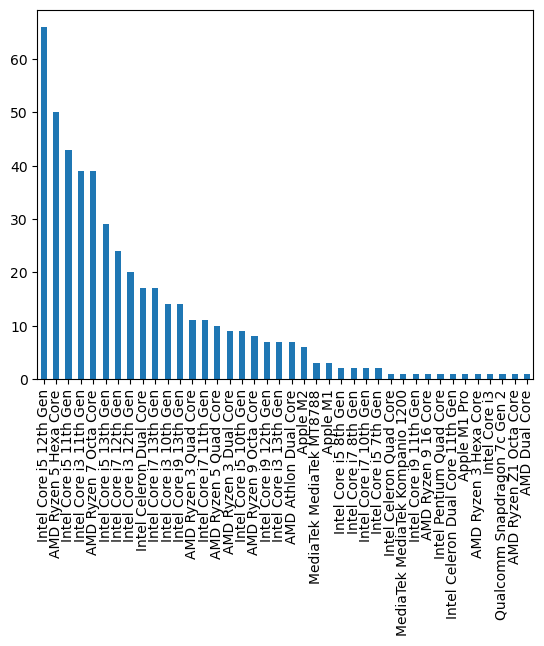

In [42]:
df['Processor Name'].value_counts().plot(kind='bar')

In [43]:
df['Processor Name'].value_counts()

Intel Core i5 12th Gen              66
AMD Ryzen 5 Hexa Core               50
Intel Core i5 11th Gen              43
Intel Core i3 11th Gen              39
AMD Ryzen 7 Octa Core               39
Intel Core i5 13th Gen              29
Intel Core i7 12th Gen              24
Intel Core i3 12th Gen              20
Intel Celeron Dual Core             17
Intel Core i7 13th Gen              17
Intel Core i3 10th Gen              14
Intel Core i9 13th Gen              14
AMD Ryzen 3 Quad Core               11
Intel Core i7 11th Gen              11
AMD Ryzen 5 Quad Core               10
AMD Ryzen 3 Dual Core                9
Intel Core i5 10th Gen               9
AMD Ryzen 9 Octa Core                8
Intel Core i9 12th Gen               7
Intel Core i3 13th Gen               7
AMD Athlon Dual Core                 7
Apple M2                             6
MediaTek MediaTek MT8788             3
Apple M1                             3
Intel Core i5 8th Gen                2
Intel Core i7 8th Gen    

In [44]:
def fetch_processors(x):
    if x=='Intel Core i5 12th Gen'or x== 'AMD Ryzen 5 Hexa Core' or x=='Intel Core i5 11th Gen' or x=='Intel Core i3 11th Gen' or x=='AMD Ryzen 7 Octa Core' or x=='Intel Core i5 13th Gen' or x=='Intel Core i7 12th Gen' or x=='Intel Core i3 12th Gen':
        return x
    elif (x.find('Intel')!=-1):
        return 'Other Intel Processor'
    elif (x.find('AMD')!=-1):
        return 'Other AMD Processor'
    elif (x.find('Apple')!=-1):
        return 'Apple Processor'
    elif (x.find('MediaTek')!=-1):
        return 'Mediatek Processor'
    else:
        return x

In [45]:
df['Processor Name']=df['Processor Name'].apply(fetch_processors)

In [46]:
df['Processor Name'].value_counts()

Other Intel Processor           109
Intel Core i5 12th Gen           66
AMD Ryzen 5 Hexa Core            50
Other AMD Processor              49
Intel Core i5 11th Gen           43
Intel Core i3 11th Gen           39
AMD Ryzen 7 Octa Core            39
Intel Core i5 13th Gen           29
Intel Core i7 12th Gen           24
Intel Core i3 12th Gen           20
Apple Processor                  10
Mediatek Processor                4
Qualcomm Snapdragon 7c Gen 2      1
Name: Processor Name, dtype: int64

In [47]:
df.drop(df.index[(df["Processor Name"] == "Qualcomm Snapdragon 7c Gen 2")],axis=0,inplace=True)

<Axes: >

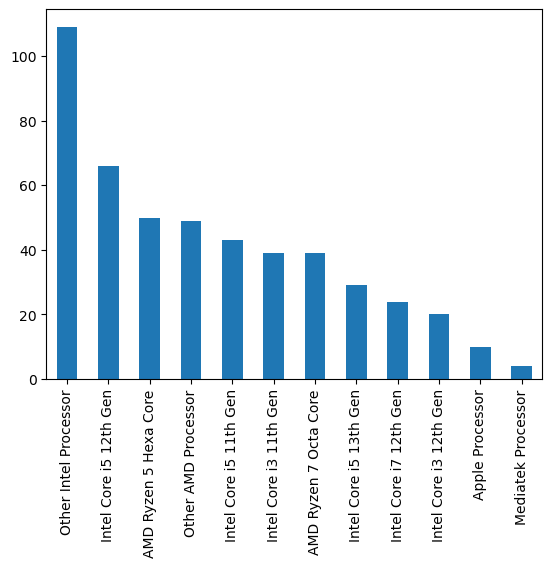

In [48]:
df['Processor Name'].value_counts().plot(kind='bar')

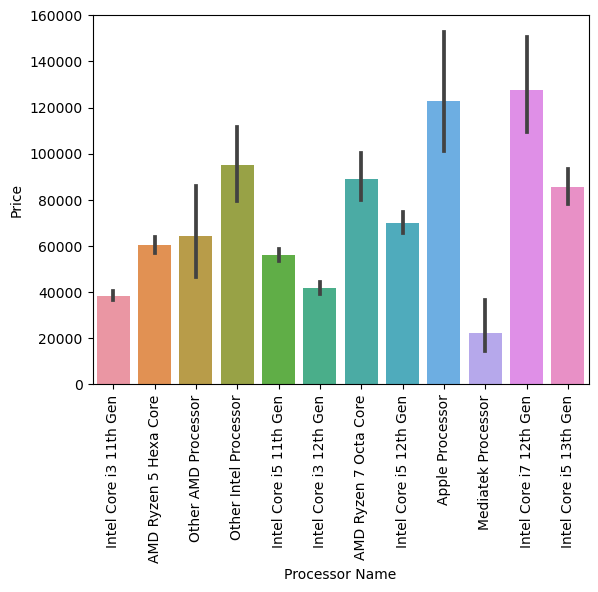

In [49]:
sns.barplot(x=df['Processor Name'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

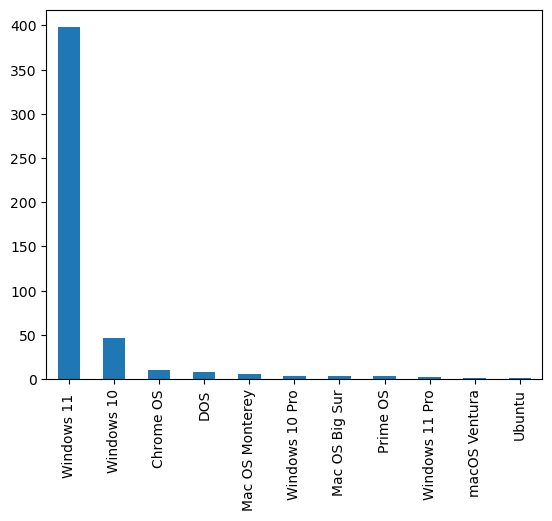

In [50]:
df['Osys'].value_counts().plot(kind='bar')

In [51]:
df['Osys'].value_counts()

Windows 11         398
Windows 10          46
Chrome OS           10
DOS                  8
Mac OS Monterey      6
Windows 10 Pro       4
Mac OS Big Sur       3
Prime OS             3
Windows 11 Pro       2
macOS Ventura        1
Ubuntu               1
Name: Osys, dtype: int64

In [52]:
def fetch_window(x):
    x=x.lower()
    if(x.find('windows')!=-1):
        return 'Windows'
    elif(x.find('mac')!=-1):
        return 'MAC'
    else:
        return 'Other'

In [53]:
df['Osys']=df['Osys'].apply(fetch_window)

<Axes: >

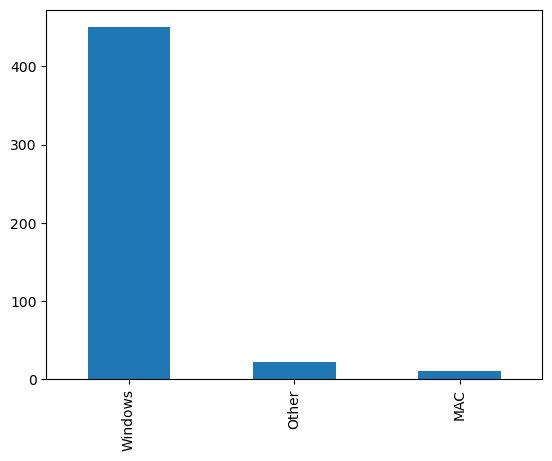

In [54]:
df['Osys'].value_counts().plot(kind='bar')

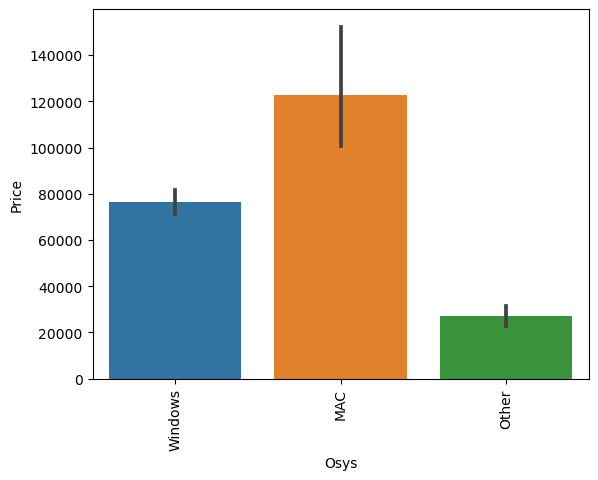

In [55]:
sns.barplot(x=df['Osys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: >

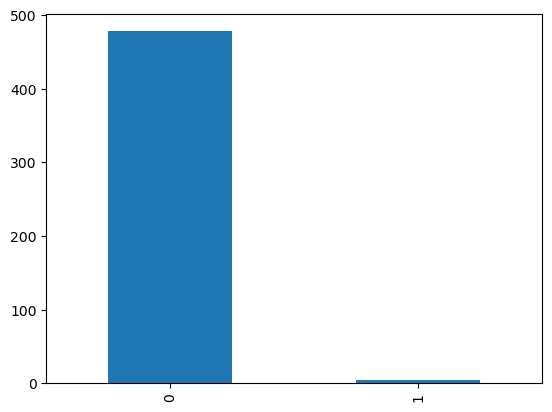

In [56]:
df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: xlabel='TouchScreen', ylabel='Price'>

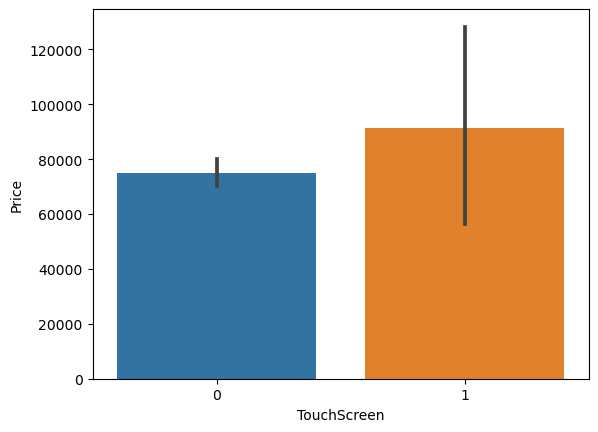

In [57]:
sns.barplot(x=df['TouchScreen'],y=df['Price'])

<Axes: >

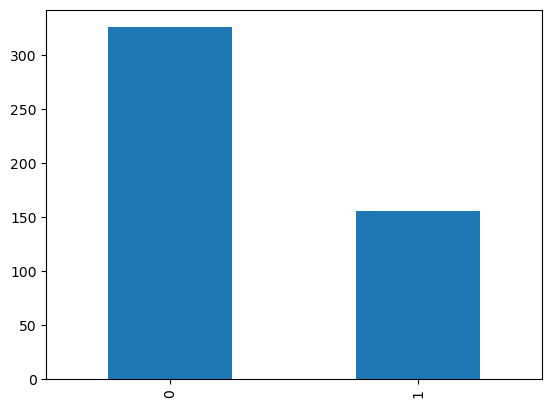

In [58]:
df['Graphic Card'].value_counts().plot(kind='bar')

<Axes: xlabel='Graphic Card', ylabel='Price'>

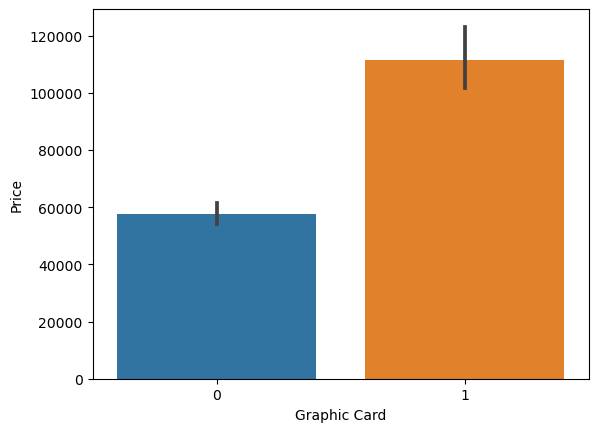

In [59]:
sns.barplot(x=df['Graphic Card'],y=df['Price'])

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\4076993975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['KGs'])


<Axes: xlabel='KGs', ylabel='Density'>

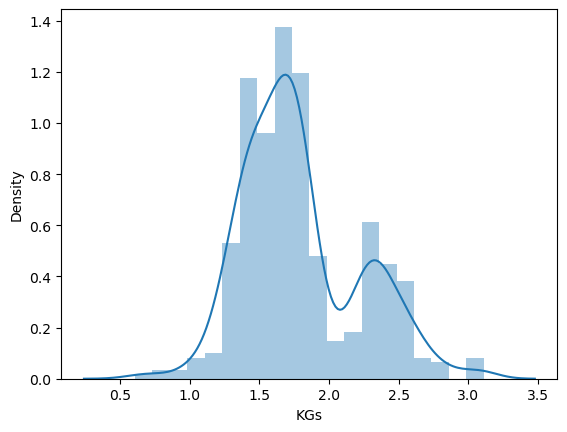

In [60]:
sns.distplot(df['KGs'])

<Axes: xlabel='KGs', ylabel='Price'>

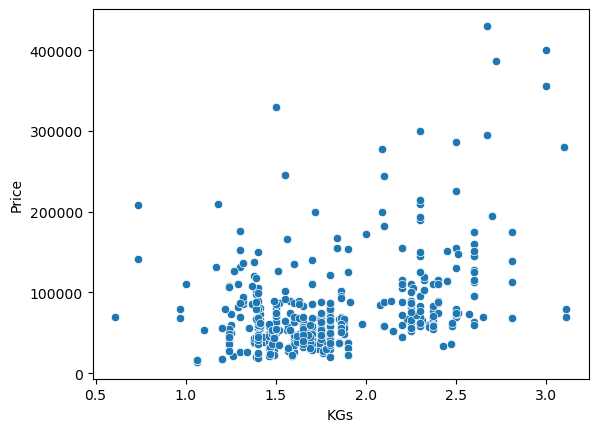

In [61]:
sns.scatterplot(x=df['KGs'],y=df['Price'])

In [62]:
df.corr()['Price']

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches          0.202677
RAM             0.723700
TouchScreen     0.027069
Graphic Card    0.457602
KGs             0.382998
X_RES           0.549990
Y_RES           0.579578
Price           1.000000
Name: Price, dtype: float64

In [63]:
df['ppi']=(((df['X_RES']**2)+(df['Y_RES']**2))**0.5)/df['Inches']

In [64]:
df['ppi']=df['ppi'].astype('float64')

In [65]:
df.sample(5)

,Company,Type,Inches,RAM,Processor Name,Osys,MEMORY,TouchScreen,Graphic Card,KGs,X_RES,Y_RES,Price,ppi
668,ASUS,Gaming Laptop,15.6,16,Intel Core i5 12th Gen,Windows,512 GB SSD,0,1,2.20,1920.0,1080.0,87990,141.211998
838,HP,chromebook,13.3,8,Mediatek Processor,Other,256 GB SSD,0,0,1.49,1920.0,1080.0,43747,165.632118
889,ASUS,Gaming Laptop,14.0,32,Other AMD Processor,Windows,1 TB SSD,0,1,1.72,2560.0,1600.0,199990,215.633854
835,HP,Gaming Laptop,15.6,8,AMD Ryzen 5 Hexa Core,Windows,512 GB SSD,0,1,1.98,1920.0,1080.0,61500,141.211998
175,HP,laptop,15.6,16,AMD Ryzen 5 Hexa Core,Windows,512 GB SSD,0,0,1.69,1920.0,1080.0,48769,141.211998


In [66]:
df.corr()['Price']

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches          0.202677
RAM             0.723700
TouchScreen     0.027069
Graphic Card    0.457602
KGs             0.382998
X_RES           0.549990
Y_RES           0.579578
Price           1.000000
ppi             0.431285
Name: Price, dtype: float64

In [67]:
df.drop(columns=['Inches','X_RES','Y_RES'],inplace=True)

In [68]:
df['MEMORY'].value_counts()

512 GB SSD                       321
1 TB SSD                          70
256 GB SSD                        50
1 TB HDD,256 GB SSD               14
64 GB EMMC Storage                 7
1 TB HDD                           4
128 GB EMMC Storage                3
128 GB SSD                         3
2 TB SSD                           3
512 GB SSD,16 GB EMMC Storage      1
32 GB EMMC Storage                 1
512 GB HDD,512 GB SSD              1
1 TB HDD,512 GB SSD                1
1 TB HDD,1 TB SSD                  1
256 GB SSD,32 GB EMMC Storage      1
4 TB SSD                           1
Name: MEMORY, dtype: int64

In [69]:
df['HDD'] = df['MEMORY'].apply(lambda x : x if 'HDD' in x else 0)
df['SSD'] = df['MEMORY'].apply(lambda x : x if 'SSD' in x else 0)
df['EMMC STORAGE']=df['MEMORY'].apply(lambda x: x if 'EMMC Storage' in x else 0)

In [70]:
def splitting_HDD(x):
     if x == 0 :
        return 0
     else:
        return x.split(',')[0]

In [71]:
df['HDD'] = df['HDD'].apply(splitting_HDD)

In [72]:
df['HDD'].value_counts()

0             461
1 TB HDD       20
512 GB HDD      1
Name: HDD, dtype: int64

In [73]:
def splitting_by_space(x):
      if x == 0 :
        return 0
      else:
        return x.split(' ')[0]

In [74]:
df['HDD'] = df['HDD'].apply(splitting_by_space)

In [75]:
df['HDD'] = df['HDD'].astype('int64')

In [76]:
df['HDD'].value_counts()

0      461
1       20
512      1
Name: HDD, dtype: int64

In [77]:
def convert_HDD(x):
    if x==1:
        return 1000
    elif x==512:
        return 512
    else:
        return 0

In [78]:
df['HDD'] = df['HDD'].apply(convert_HDD)

In [79]:
df['HDD'].value_counts()

0       461
1000     20
512       1
Name: HDD, dtype: int64

In [80]:
df['SSD'] = df['SSD'].astype('str')
def splitting_SSD(x): 
        
    
        if(x.find('SSD' and 'EMMC Storage')!=-1):
            return x.split(',')[0]
        elif(x.find('HDD' and 'SSD')!=-1):
            return x.split(',')[-1]
        elif(x.find('SSD')!=-1):
            return x
        else:
            return 0

In [81]:
df['SSD']=df['SSD'].apply(splitting_SSD)

In [82]:
df['SSD'].value_counts()

512 GB SSD    324
1 TB SSD       71
256 GB SSD     65
0              15
128 GB SSD      3
2 TB SSD        3
4 TB SSD        1
Name: SSD, dtype: int64

In [83]:
df['SSD']=df['SSD'].apply(splitting_by_space)

In [84]:
df['SSD'].value_counts()

512    324
1       71
256     65
0       15
128      3
2        3
4        1
Name: SSD, dtype: int64

In [85]:
df['SSD'] = df['SSD'].astype('int64')

In [86]:
def convert_SSD(x):
    if x==1:
        return 1000
    elif x==2:
        return 2000
    elif x==4:
        return 4000
    elif x==128:
        return 128
    elif x==256:
        return 256
    elif x==512:
        return 512
    else:
        return 0

In [87]:
df['SSD']=df['SSD'].apply(convert_SSD)

In [88]:
df['SSD'].value_counts()

512     324
1000     71
256      65
0        15
128       3
2000      3
4000      1
Name: SSD, dtype: int64

In [89]:
def splitting_emmc(x):
    if x==0:
        return 0
    else:
        return x.split(',')[-1]

In [90]:
df['EMMC STORAGE']=df['EMMC STORAGE'].apply(splitting_emmc)

In [91]:
df['EMMC STORAGE'].value_counts()

0                      469
64 GB EMMC Storage       7
128 GB EMMC Storage      3
32 GB EMMC Storage       2
16 GB EMMC Storage       1
Name: EMMC STORAGE, dtype: int64

In [92]:
df['EMMC STORAGE']=df['EMMC STORAGE'].apply(splitting_by_space)

In [93]:
df['EMMC STORAGE'].value_counts()

0      469
64       7
128      3
32       2
16       1
Name: EMMC STORAGE, dtype: int64

In [94]:
df['EMMC STORAGE'] = df['EMMC STORAGE'].astype('int64')

In [95]:
df.drop(columns='MEMORY',inplace=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 983
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         482 non-null    object 
 1   Type            482 non-null    object 
 2   RAM             482 non-null    int64  
 3   Processor Name  482 non-null    object 
 4   Osys            482 non-null    object 
 5   TouchScreen     482 non-null    int64  
 6   Graphic Card    482 non-null    int64  
 7   KGs             482 non-null    float64
 8   Price           482 non-null    int64  
 9   ppi             482 non-null    float64
 10  HDD             482 non-null    int64  
 11  SSD             482 non-null    int64  
 12  EMMC STORAGE    482 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 52.7+ KB


In [97]:
df.sample(5)

,Company,Type,RAM,Processor Name,Osys,TouchScreen,Graphic Card,KGs,Price,ppi,HDD,SSD,EMMC STORAGE
435,HP,laptop,8,Intel Core i5 12th Gen,Windows,0,0,1.41,62249,157.350512,0,512,0
7,HP,Gaming Laptop,8,AMD Ryzen 5 Hexa Core,Windows,0,1,2.37,54990,141.211998,0,512,0
198,Infinix,laptop,8,Intel Core i3 11th Gen,Windows,0,0,1.58,31990,163.178309,0,256,0
942,Acer,laptop,8,Intel Core i5 11th Gen,Windows,0,0,1.65,47499,141.211998,0,512,0
264,Acer,Gaming Laptop,16,Other Intel Processor,Windows,0,1,2.60,124990,141.509717,0,1000,0


In [98]:
df.corr()['Price']

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


RAM             0.723700
TouchScreen     0.027069
Graphic Card    0.457602
KGs             0.382998
Price           1.000000
ppi             0.431285
HDD            -0.055997
SSD             0.717042
EMMC STORAGE   -0.149825
Name: Price, dtype: float64

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

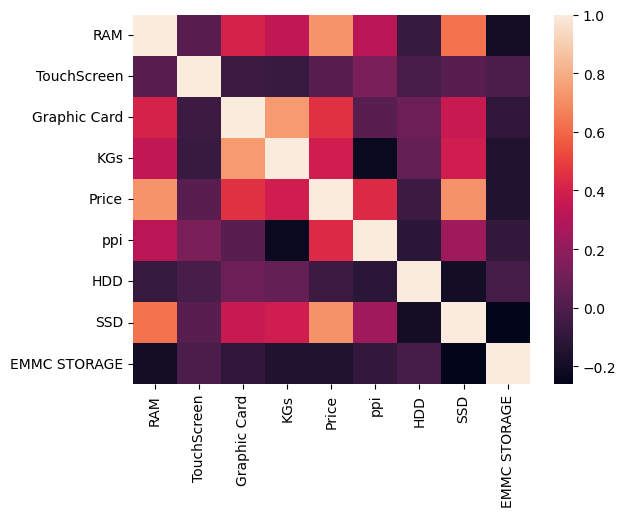

In [99]:
sns.heatmap(df.corr())

In [100]:
#No strong correlation among the columns.

In [101]:
#Therefore, we will keep them in modelling.

In [102]:
#Our target column price is skewed --- which could annoy the ML Algorithms. 
#Therefore, we will convert it to normal using log transformation.

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

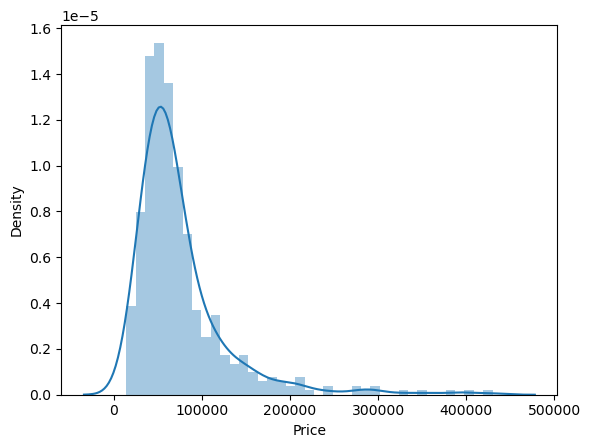

In [103]:
sns.distplot(df['Price'])

C:\Users\USER\AppData\Local\Temp\ipykernel_38580\3556049916.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

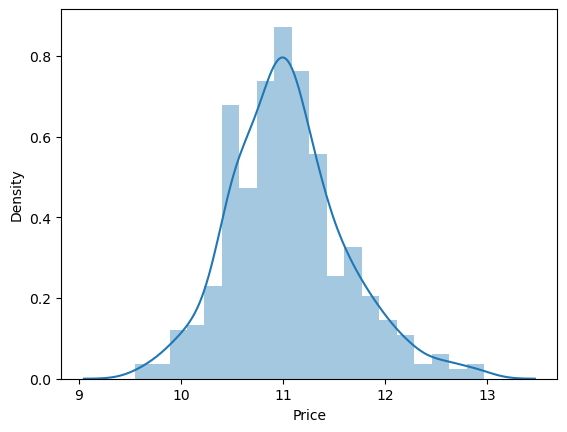

In [104]:
sns.distplot(np.log(df['Price']))

In [105]:
df.sample(3)

,Company,Type,RAM,Processor Name,Osys,TouchScreen,Graphic Card,KGs,Price,ppi,HDD,SSD,EMMC STORAGE
523,Lenovo,Gaming Laptop,8,Other Intel Processor,Windows,0,1,2.2,60000,141.211998,1000,256,0
333,Acer,Gaming Laptop,16,Intel Core i5 12th Gen,Windows,0,1,2.5,72990,141.211998,0,512,0
595,ASUS,Gaming Laptop,16,Intel Core i7 12th Gen,Windows,0,1,2.6,114990,127.335675,0,1000,0


In [106]:
# DUMMY COLUMNS

In [107]:
#Company

dummies_laptop_company= pd.get_dummies(df['Company'])
dummies_laptop_company

,APPLE,ASUS,Acer,CHUWI,DELL,GIGABYTE,HP,Infinix,Lenovo,MSI,Mi,Primebook,SAMSUNG,realme
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,0,0,0,0,0,0,0,0,1,0,0,0,0,0
965,0,1,0,0,0,0,0,0,0,0,0,0,0,0
978,0,0,0,0,0,0,0,0,1,0,0,0,0,0
979,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [108]:
df['Company'].value_counts()

ASUS         123
HP            99
Lenovo        69
DELL          54
MSI           45
Acer          43
Infinix       21
APPLE         10
SAMSUNG        6
GIGABYTE       5
Primebook      3
CHUWI          2
realme         1
Mi             1
Name: Company, dtype: int64

In [109]:
#Type

dummies_type= pd.get_dummies(df['Type'])
dummies_type

,2 in 1 gaming laptop,2 in 1 laptop,Gaming Laptop,business laptop,chromebook,laptop,notebook
0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
963,0,1,0,0,0,0,0
965,0,0,1,0,0,0,0
978,0,0,0,0,0,1,0
979,0,0,1,0,0,0,0


In [110]:
df['Type'].value_counts()

laptop                  275
Gaming Laptop           151
2 in 1 laptop            23
notebook                 12
chromebook               10
business laptop           6
2 in 1 gaming laptop      5
Name: Type, dtype: int64

In [111]:
#Processor Name

dummies_Processor= pd.get_dummies(df['Processor Name'])
dummies_Processor

,AMD Ryzen 5 Hexa Core,AMD Ryzen 7 Octa Core,Apple Processor,Intel Core i3 11th Gen,Intel Core i3 12th Gen,Intel Core i5 11th Gen,Intel Core i5 12th Gen,Intel Core i5 13th Gen,Intel Core i7 12th Gen,Mediatek Processor,Other AMD Processor,Other Intel Processor
0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
963,0,0,0,1,0,0,0,0,0,0,0,0
965,0,0,0,0,0,0,0,0,0,0,1,0
978,0,0,0,0,0,0,0,0,0,0,0,1
979,0,0,0,0,0,0,0,0,1,0,0,0


In [112]:
df['Processor Name'].value_counts()

Other Intel Processor     109
Intel Core i5 12th Gen     66
AMD Ryzen 5 Hexa Core      50
Other AMD Processor        49
Intel Core i5 11th Gen     43
Intel Core i3 11th Gen     39
AMD Ryzen 7 Octa Core      39
Intel Core i5 13th Gen     29
Intel Core i7 12th Gen     24
Intel Core i3 12th Gen     20
Apple Processor            10
Mediatek Processor          4
Name: Processor Name, dtype: int64

In [113]:
dummies_osys=pd.get_dummies(df['Osys'])
dummies_osys

,MAC,Other,Windows
0,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
963,0,0,1
965,0,0,1
978,0,0,1
979,0,0,1


In [114]:
df['Osys'].value_counts()

Windows    450
Other       22
MAC         10
Name: Osys, dtype: int64

In [115]:
##Merging DataFrame

In [116]:
merged_df = pd.concat([df,dummies_laptop_company,dummies_type,dummies_Processor,dummies_osys], axis='columns')

In [117]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 983
Data columns (total 49 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Company                 482 non-null    object 
 1   Type                    482 non-null    object 
 2   RAM                     482 non-null    int64  
 3   Processor Name          482 non-null    object 
 4   Osys                    482 non-null    object 
 5   TouchScreen             482 non-null    int64  
 6   Graphic Card            482 non-null    int64  
 7   KGs                     482 non-null    float64
 8   Price                   482 non-null    int64  
 9   ppi                     482 non-null    float64
 10  HDD                     482 non-null    int64  
 11  SSD                     482 non-null    int64  
 12  EMMC STORAGE            482 non-null    int64  
 13  APPLE                   482 non-null    uint8  
 14  ASUS                    482 non-null    ui

In [118]:
##Dropping Categorical Columns :

In [119]:
merged_df.drop(columns=['Company','Type','Osys','Processor Name'], inplace=True)

In [120]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 983
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RAM                     482 non-null    int64  
 1   TouchScreen             482 non-null    int64  
 2   Graphic Card            482 non-null    int64  
 3   KGs                     482 non-null    float64
 4   Price                   482 non-null    int64  
 5   ppi                     482 non-null    float64
 6   HDD                     482 non-null    int64  
 7   SSD                     482 non-null    int64  
 8   EMMC STORAGE            482 non-null    int64  
 9   APPLE                   482 non-null    uint8  
 10  ASUS                    482 non-null    uint8  
 11  Acer                    482 non-null    uint8  
 12  CHUWI                   482 non-null    uint8  
 13  DELL                    482 non-null    uint8  
 14  GIGABYTE                482 non-null    ui

In [121]:
merged_df.head()

,RAM,TouchScreen,Graphic Card,KGs,Price,ppi,HDD,SSD,EMMC STORAGE,APPLE,...,Intel Core i5 11th Gen,Intel Core i5 12th Gen,Intel Core i5 13th Gen,Intel Core i7 12th Gen,Mediatek Processor,Other AMD Processor,Other Intel Processor,MAC,Other,Windows
0,8,0,0,1.80,34990,141.211998,0,256,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8,0,0,1.80,35990,148.845079,0,512,0,0,...,0,0,0,0,0,0,0,0,0,1
3,8,0,0,1.65,48450,154.049452,0,512,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,0,0,1.69,38990,141.211998,0,512,0,0,...,0,0,0,0,0,0,0,0,0,1
5,8,0,0,1.46,37880,157.350512,0,512,0,0,...,0,0,0,0,0,1,0,0,0,1


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
# Seperating Dependent and Independent Variables : 

In [3]:
# Before log transformation of 'PRICE

In [4]:
#Independent variables
x=merged_df.drop(columns=['Price'])


#Dependent variable
y=merged_df['Price']


NameError: name 'merged_df' is not defined

In [ ]:
#Splitting of data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)


In [127]:
# Linear regression :
  
reg = LinearRegression()

In [128]:
reg

LinearRegression()

In [129]:
reg.fit(x_train,y_train)

LinearRegression()

In [130]:
y_pred_train=reg.predict(x_train)

In [131]:
r2_score(y_train,y_pred_train)

0.7852726074990284

In [132]:
mean_absolute_error(y_train,y_pred_train)

17534.50466580056

In [133]:
mean_squared_error(y_train,y_pred_train)

728697170.4546542

In [134]:
y_pred_test=reg.predict(x_test)

In [135]:
r2_score(y_test,y_pred_test)

0.7424798460111458

In [136]:
mean_absolute_error(y_test,y_pred_test)

16523.36457975522

In [137]:
mean_squared_error(y_test,y_pred_test)

502706659.62294835

In [138]:
import statsmodels.api as sm
model1=sm.OLS(y_train,x_train)
result=model1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     33.96
Date:                Wed, 27 Sep 2023   Prob (F-statistic):           4.28e-88
Time:                        14:15:38   Log-Likelihood:                -4195.7
No. Observations:                 361   AIC:                             8463.
Df Residuals:                     325   BIC:                             8603.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
RAM                     3910

In [139]:
# After log transformation of 'PRICE

In [140]:
#Independent variables
x=merged_df.drop(columns=['Price'])


#Dependent variable
y1=np.log(merged_df['Price'])


In [141]:
y1

0      10.462818
2      10.490996
3      10.788288
4      10.571060
5      10.542179
         ...    
963    10.914907
965    11.944643
978    10.584056
979    11.686879
983    11.735989
Name: Price, Length: 482, dtype: float64

In [142]:
#Splitting of data
x_train,x_test,y_train,y_test=train_test_split(x,y1,test_size=0.25,random_state=3)

In [143]:
reg.fit(x_train,y_train)

LinearRegression()

In [144]:
y_pred_train=reg.predict(x_train)

In [145]:
r2_score(y_train,y_pred_train)

0.8715137181233288

In [146]:
y_pred_test=reg.predict(x_test)

In [147]:
r2_score(y_test,y_pred_test)

0.827986958810472